In [5]:
import os
#os.chdir('C://Users//Scanimage//Desktop//GitHub Code Mori//caiman_online')
os.chdir(r'C:\Users\Res_Imaging\Desktop\Github_code\caiman_online\simulate_analysis')
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

from simulate_caiman_main import SimulateAcq
from utils import tic, toc, ptoc, remove_artifacts, mm3d_to_img 

In [6]:
# # make a structural image
# # can do however you want, just needs to be an image that matches the X dims in image_params (100,400)

# mm3d_file = glob('E:/caiman_scratch/template/*.mat')[0]
# mm3d_img = mm3d_to_img(mm3d_file, chan=0)

# # below should work on any image
# structural_image = remove_artifacts(mm3d_img, 100, 400)
# structural_image = structural_image[0,:,:] # select for only top plane in image

# plt.imshow(structural_image)

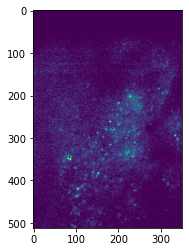

In [7]:
from glob import glob 
import imageio
import cv2

user_name = 'Mora'
x_start = 100
x_end = 450
date = '20200706'
mouse = 'MBOT4_212'
exp_name = 'stim'



tif_folder = 'D://'+ user_name + '//' + date +'//' + mouse + '//' + exp_name + '//'
tif_folder=r'F:\Experiments\EMX-triples\20200706\MBOT4_212\FOV2\stim//'
reference_folder ='D://' + user_name +'//'+ date +'//'+ mouse +'//'+ 'reference' + '//'
reference_folder=r'F:\Experiments\EMX-triples\20200706\MBOT4_212\FOV2\Reference_212_CAG_Chrome2s_26dpi_PMTs700_duraFlat//'
image_path = glob(reference_folder + '*.png')[0]


mR= imageio.imread(image_path)
image = mR[:,x_start:x_end,0]
cv2.imwrite(reference_folder + 'caiman_template.png',image)
plt.imshow(image)

In [8]:
reference_folder

'F:\\Experiments\\EMX-triples\\20200706\\MBOT4_212\\FOV2\\Reference_212_CAG_Chrome2s_26dpi_PMTs700_duraFlat//'

In [9]:
seedWithSuite2p  = False
if seedWithSuite2p ==True:
    suite2p_path = 'D://Mora//20200802//MBOT5_419//ori//suite2p//plane0//'
    seed = np.load(suite2p_path+'seeding_template_caiman.npy')

In [10]:
seed.shape

NameError: name 'seed' is not defined

In [11]:
dxy = (1.5, 1.5) # spatial resolution in x and y in (um per pixel)
max_shift_um = (12., 12.) # maximum shift in um
patch_motion_xy = (25., 25.) # patch size for non-rigid correction in um

image_params = {
    'channels': 2,
    'planes': 1,
    'x_start': x_start,
    'x_end': x_end,
    'folder': tif_folder, # this is where the tiffs are
    'chunk_size': 300, # number of tiffs to do at once: we recommend around 4000 frames
    'structural_img': image,
    #'seed': None #added to use external seeding
}

caiman_params = {
    'fr': 15,  # imaging rate in frames per second, per plane
    'overlaps': (24, 24),
    'max_deviation_rigid': 3,
    'p': 2,  # deconv 0 is off, 1 is slow, 2 is fast
    'nb': 3,  # background compenents -> nb: 3 for complex
    'decay_time': 1.0,  # sensor tau
    'gSig': (7, 7),  # expected half size of neurons in pixels, very important for proper component detection
    'only_init': False,  # has to be `False` when seeded CNMF is used
    'rf': None,  # half-size of the patches in pixels. Should be `None` when seeded CNMF is used.
    'pw_rigid': True,  # piece-wise rigid flag
    'ssub': 1,
    'tsub': 1,
    'merge_thr': 0.99, # cells with this or higher correlation will be merged
    'num_frames_split': 20,
    'border_nan': 'copy',
    'max_shifts': [int(a/b) for a, b in zip(max_shift_um, dxy)],
    'strides': tuple([int(a/b) for a, b in zip(patch_motion_xy, dxy)])
}

In [12]:
expt = SimulateAcq(caiman_params, **image_params)
expt.run_fake_expt()

Starting segmentation on a provided template...
done in 2.4567 s
found 806 cells
Setting up caiman...
Starting local cluster... done.
Nothing to remove!
Nothing to remove!
Nothing to remove!
Nothing to remove!
Memory mapping current file... done. Took 312.6470s
Starting motion correction and CNMF...
spatial support for each components given by the user
CNMF fitting done. Took 525.0914s


In [ ]:
seed.all() == None

In [ ]:
1

In [ ]:
1